## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## 1. Look at HallOfFame table

In [2]:
hof = pd.read_csv("HallOfFame.csv")
hof.shape

(4191, 9)

### 1.1 Remain the data with category of Player

In [3]:
hof_player = hof[hof['category']=='Player']
hof_player.shape

(4066, 9)

### 1.2 Find out the ways players were elected to the Hall of Fame

In [4]:
hof_player.votedBy.value_counts()

BBWAA               3698
Veterans             142
Run Off               81
Nominating Vote       76
Old Timers            25
Negro League          21
Final Ballot          21
Special Election       2
Name: votedBy, dtype: int64

In [5]:
hof_player[hof_player['inducted']=='Y'].votedBy.value_counts()

BBWAA               123
Veterans             82
Old Timers           25
Negro League         21
Run Off               3
Special Election      2
Name: votedBy, dtype: int64

In [6]:
hof_player[hof_player['inducted']=='Y'].shape

(256, 9)

### 1.3 Find out the number of players with the times when they were elected to the Hall of Fame

In [7]:
inducted_name = list(hof_player[hof_player['inducted']=='Y'].playerID)
inducted_name[:5]

['cobbty01', 'ruthba01', 'wagneho01', 'mathech01', 'johnswa01']

In [8]:
times_player = hof_player.copy()
times_player['inductedName'] = hof_player['playerID'].apply(lambda x: x in inducted_name)
times_player = times_player[times_player['inductedName']]
times_player.shape

(1574, 10)

In [9]:
times_player.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,inductedName
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN,True
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,True
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN,True
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN,True
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN,True


In [10]:
electedTimes = times_player.groupby('playerID').size().to_frame()
electedTimes.columns=['times']

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


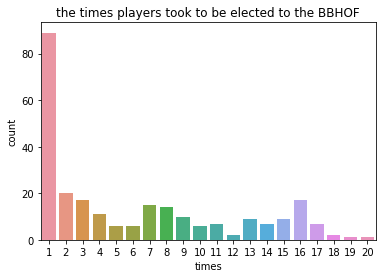

In [11]:
f, ax = plt.subplots()
ax.set_title("the times players took to be elected to the BBHOF")
sns.countplot(data=electedTimes,x='times')
plt.show()

## 2. People table and calculate new features

- servingDays = finalGame - debut
- debutAge = debut - birthYear

In [12]:
# calculte servingDays and debutAge
player = pd.read_csv("People.csv",parse_dates=["debut","finalGame","birthYear"])
player['servingDays']=(player["finalGame"] - player["debut"]).apply(lambda x: x.days)
player['debutAge']=(player["debut"] - player["birthYear"]).apply(lambda x: x.days/365)
player.shape

(19370, 26)

### 2.1 Delete players whose finalGame are after 2012,
which means they can not be able to be elected now.

In [13]:
player = player[player['debut'].apply(lambda x: x.year>=1942)]
player.shape

(11881, 26)

In [14]:
player = player[player['finalGame'].apply(lambda x: x.year<=2012)]
player.shape

(9468, 26)

## 3. Merge People table and HallOfFame table

In [15]:
player = player.join(hof_player[hof_player.inducted == "Y"][["playerID","inducted"]].set_index("playerID"),\
                     on="playerID")
player.inducted.fillna("N",inplace=True)
player.shape

(9468, 27)

### 3.1 Look at the distribution of weight, hight, servingDays and debutAge with players being inducted or not

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


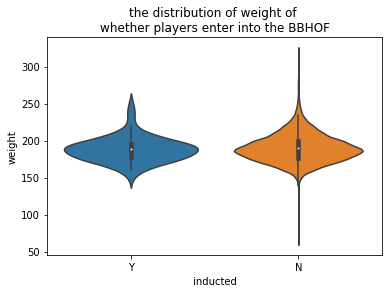

In [16]:
f, ax = plt.subplots()
ax.set_title("the distribution of weight of \nwhether players enter into the BBHOF")
sns.violinplot(y='weight',x='inducted',data=player)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


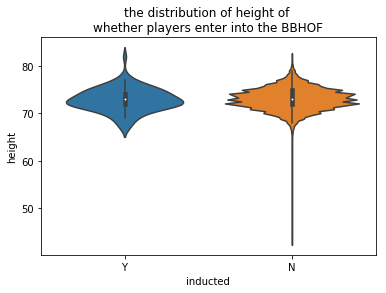

In [17]:
f, ax = plt.subplots()
ax.set_title("the distribution of height of \nwhether players enter into the BBHOF")
sns.violinplot(y='height',x='inducted',data=player)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


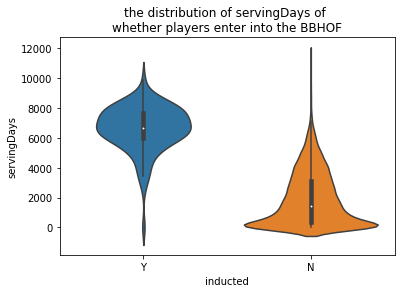

In [18]:
f, ax = plt.subplots()
ax.set_title("the distribution of servingDays of \nwhether players enter into the BBHOF")
sns.violinplot(y='servingDays',x='inducted',data=player)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


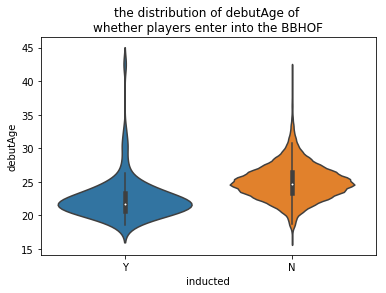

In [19]:
f, ax = plt.subplots()
ax.set_title("the distribution of debutAge of \nwhether players enter into the BBHOF")
sns.violinplot(y='debutAge',x='inducted',data=player)

In [20]:
player.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID', 'servingDays', 'debutAge', 'inducted'],
      dtype='object')

### 3.2 Keep selected features

In [21]:
merged_player = player[['playerID','debut','finalGame','weight','servingDays', 'debutAge', 'inducted']]
merged_player.shape

(9468, 7)

## 4. Batting table and calculate new features
- AB, R, BA (H/AB), G, HR, RBI, SB, SF
- OBP (H+BB+HBP)/(AB+BB+HBP+SF),
- SLG (H+2B+23B+3HR)/AB
- AB/G, R/G, HR/G, RBI/G, SB/G

In [22]:
# calculte servingDays
batting = pd.read_csv("Batting.csv")

In [23]:
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [24]:
cont_col = ['playerID','G', 'AB', 'R', 'H','2B', '3B', 
            'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 
            'HBP', 'SH', 'SF', 'GIDP']
# aggregate batting table
batting = batting[cont_col].groupby('playerID').sum()

# new features
batting['BA']=batting['H']/batting['AB']
batting['OBP']=(batting['H']+batting['BB']+
                batting['HBP'])/(batting['AB']+
                batting['BB']+batting['HBP']+batting['SF'])
batting['SLF']=(batting['H']+2*batting['2B']+
                    3*batting['3B']+4*batting['HR'])/(batting['AB'])
batting['AB/G'] = batting['AB']/batting['G']
batting['R/G'] = batting['R']/batting['G']
batting['HR/G'] = batting['HR']/batting['G']
batting['SB/G'] = batting['SB']/batting['G']
batting['RBI/G'] = batting['RBI']/batting['G']
batting['IBB/G'] = batting['IBB']/batting['G']
batting['SF/G'] = batting['SF']/batting['G']

In [25]:
batting = batting[batting['AB']>0]
batting.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,...,BA,OBP,SLF,AB/G,R/G,HR/G,SB/G,RBI/G,IBB/G,SF/G
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,331,4,0,0,0,0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.012085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,...,0.304998,0.373949,0.673973,3.748939,0.659187,0.228927,0.072771,0.696483,0.088842,0.036689
aaronto01,437,944,102,216,42,6,13,94.0,9.0,8.0,...,0.228814,0.291506,0.391949,2.160183,0.233410,0.029748,0.020595,0.215103,0.006865,0.013730
aasedo01,448,5,0,0,0,0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.011161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abadan01,15,21,1,2,0,0,0,0.0,0.0,1.0,...,0.095238,0.240000,0.095238,1.400000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
batting.columns

Index(['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'BA', 'OBP', 'SLF', 'AB/G', 'R/G',
       'HR/G', 'SB/G', 'RBI/G', 'IBB/G', 'SF/G'],
      dtype='object')

In [27]:
batting1 = batting[['G',  'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G', 'RBI/G', 'IBB/G', 'SF/G']]

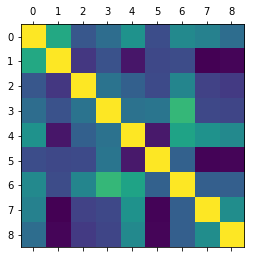

In [28]:
plt.matshow(batting1.corr())

In [29]:
batting1.shape

(17109, 9)

In [30]:
# batting_cate_temp = batting[['playerID','lgID']]
# batting_cate_temp = batting_cate_temp.fillna(-1)

In [31]:
# batting_cate = batting_cate_temp.groupby('playerID').agg(lambda x: x.value_counts().index[0])
# batting_cate.columns

In [32]:
# batting_cate = batting_cate.replace(-1,np.nan)

In [33]:
# batting_group = pd.concat([batting_cont,batting_cate],axis=1)

In [34]:
# batting_group.shape

## 3. Merge Batting table with merged player DataFrame

In [30]:
merged_player2 = batting1.merge(merged_player, on="playerID")

In [31]:
merged_player2.shape

(8118, 16)

In [33]:
merged_player2.head()

,playerID,G,SH,OBP,AB/G,HR/G,SB/G,RBI/G,IBB/G,SF/G,debut,finalGame,weight,servingDays,debutAge,inducted
0,aaronha01,3298,21.0,0.373949,3.748939,0.228927,0.072771,0.696483,0.088842,0.036689,1954-04-13,1976-10-03,180.0,8209.0,20.293151,Y
1,aaronto01,437,9.0,0.291506,2.160183,0.029748,0.020595,0.215103,0.006865,0.013730,1962-04-10,1971-09-26,190.0,3456.0,23.287671,N
2,aasedo01,448,0.0,0.000000,0.011161,0.000000,0.000000,0.000000,0.000000,0.000000,1977-07-26,1990-10-03,190.0,4817.0,23.580822,N
3,abadan01,15,0.0,0.240000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-09-10,2006-04-13,184.0,1676.0,29.712329,N
4,abbotje01,233,5.0,0.307453,2.557940,0.077253,0.025751,0.356223,0.008584,0.030043,1997-06-10,2001-09-29,190.0,1572.0,25.457534,N


## 4. Fielding table
- fielding percentage (FPCT) = (A + PO) / ( A + PO + E)

In [41]:
fielding = pd.read_csv("Fielding.csv")
fielding.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'POS', 'G', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB', 'CS', 'ZR'],
      dtype='object')

In [42]:
fielding.isnull().sum()

playerID         0
yearID           0
stint            0
teamID           0
lgID          1513
POS              0
G                0
GS           50742
InnOuts      36524
PO               0
A                0
E                1
DP               0
PB          127487
WP          137669
SB          130932
CS          130932
ZR          137669
dtype: int64

In [48]:
fielding1 = fielding[fielding['POS']=='P']
pitching_names = list(fielding1.groupby('playerID').size().index)

In [49]:
batting_nopitching = merged_player2.copy()
batting_nopitching['P'] = batting_nopitching['playerID'].apply(lambda x: x in pitching_names)

In [51]:
batting_nopitching = batting_nopitching[batting_nopitching['P']==False]

In [55]:
merged_player2.shape

(8118, 16)

In [52]:
batting_nopitching.shape

(4570, 17)

In [56]:
batting_nopitching.head()

,playerID,G,SH,OBP,AB/G,HR/G,SB/G,RBI/G,IBB/G,SF/G,debut,finalGame,weight,servingDays,debutAge,inducted,P
0,aaronha01,3298,21.0,0.373949,3.748939,0.228927,0.072771,0.696483,0.088842,0.036689,1954-04-13,1976-10-03,180.0,8209.0,20.293151,Y,False
1,aaronto01,437,9.0,0.291506,2.160183,0.029748,0.020595,0.215103,0.006865,0.013730,1962-04-10,1971-09-26,190.0,3456.0,23.287671,N,False
3,abadan01,15,0.0,0.240000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-09-10,2006-04-13,184.0,1676.0,29.712329,N,False
4,abbotje01,233,5.0,0.307453,2.557940,0.077253,0.025751,0.356223,0.008584,0.030043,1997-06-10,2001-09-29,190.0,1572.0,25.457534,N,False
6,abbotku01,702,21.0,0.305077,2.911681,0.088319,0.031339,0.344729,0.015670,0.017094,1993-09-07,2001-04-13,180.0,2775.0,24.698630,N,False


In [61]:
batting_nopitching.columns

Index(['playerID', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G', 'RBI/G', 'IBB/G',
       'SF/G', 'debut', 'finalGame', 'weight', 'servingDays', 'debutAge',
       'inducted', 'P'],
      dtype='object')

In [179]:
feat = ['G', 'SH', 'OBP', 'AB/G', 'RBI/G']#, 'HR/G', 'SB/G', 'IBB/G',
      # 'SF/G','weight', 'servingDays']

In [180]:
X = batting_nopitching[feat]
y = batting_nopitching[['inducted']]

In [185]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB


pre = batting_nopitching.copy()
pre['predict'] = 0
kf = KFold(n_splits=3)
num = 0
i=0
for train, test in kf.split(X):
#     model = XGBClassifier()
    model = GaussianNB() 
#     sm = SMOTE(random_state=42)
#     X_res, y_res = sm.fit_sample(X.iloc[train], y.iloc[train])
#     X_res = pd.DataFrame(X_res)
#     y_res = pd.DataFrame(y_res)
#     X_res.columns = X.columns
#     y_res.columns = y.columns
#     model.fit(X_res, y_res)
    model.fit(X.iloc[train], y.iloc[train])
    pre.iloc[test,-1]=model.predict(X.iloc[test])

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
pre.inducted.value_counts()

N    4505
Y      65
Name: inducted, dtype: int64

In [187]:
pre.predict.value_counts()

N    4236
Y     334
Name: predict, dtype: int64

In [188]:
confusion_matrix(pre.inducted,pre.predict)

array([[4233,  272],
       [   3,   62]])

In [136]:
X

array([[-0.27126113,  1.88663904,  0.4257523 , ...,  0.55820327,
        -0.54562849,  0.12710617],
       [-2.06947249,  1.72056896, -0.64016106, ..., -0.76494431,
        -1.57471131, -0.04753333],
       [-0.20769822, -0.33284919,  1.37265908, ...,  0.03917614,
         0.22502891,  0.90827225],
       ...,
       [ 1.07282353, -0.52578537, -0.87981073, ..., -1.6101395 ,
         0.14297433, -0.50581888],
       [-0.48323585,  0.89892743,  0.00704613, ...,  0.31456258,
        -0.41243498, -0.37286792],
       [ 0.13317063, -0.52905467,  0.91063537, ..., -1.34877197,
         0.63667007, -0.02700027]])

In [174]:
y1 = y.copy()
y1[y1.inducted=='N']=False
y1[y1.inducted=='Y']=True

In [149]:
model = XGBClassifier()

In [151]:
X.shape

(4570, 2)

In [152]:
y.shape

(4570, 1)

In [176]:
rfecv.support_

array([ True,  True,  True,  True, False, False,  True, False, False,
       False, False])

In [177]:
rfecv.ranking_

array([1, 1, 1, 1, 3, 2, 1, 5, 4, 7, 6])

In [178]:
X.columns

Index(['G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G', 'RBI/G', 'IBB/G', 'SF/G',
       'weight', 'servingDays'],
      dtype='object')

In [189]:
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
              scoring='roc_auc')
rfecv.fit(X, y1)
rfecv.grid_scores_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

Optimal number of features : 3


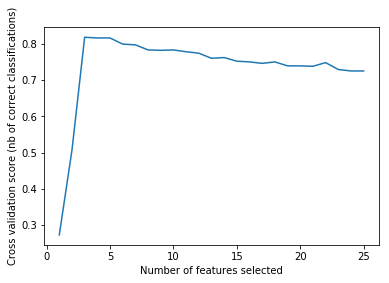

In [130]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [129]:
ranking

array([[64, 50, 31, 23, 10, 17, 34, 51],
       [57, 37, 30, 43, 14, 32, 44, 52],
       [54, 41, 19, 15, 28,  8, 39, 53],
       [55, 45,  9, 18, 20, 38,  1, 59],
       [63, 42, 25, 35, 29, 16,  2, 62],
       [61, 40,  5, 11, 13,  6,  4, 58],
       [56, 47, 26, 36, 24,  3, 22, 48],
       [60, 49,  7, 27, 33, 21, 12, 46]])

In [79]:
X

,G,SH,OBP,AB/G,HR/G,SB/G,RBI/G,IBB/G,SF/G,weight,servingDays
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
10,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
12,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
16,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
17,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
18,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
kf = KFold(n_splits=5)
num = 0
for train, test in kf.split(X):
#     model = XGBClassifier(max_delta_step=1)
#     model.fit(X.iloc[train,:], y.iloc[train,:])
#     outlier_prob = model.predict_proba(X.iloc[test,:])[:,1]
    
#     players_pre = players_new.iloc[test,:]



In [67]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
model = XGBClassifier(max_delta_step=1)        
# sm = SMOTE(random_state=42)
#         X_res, y_res = sm.fit_sample(X.iloc[train,:], y.iloc[train,:])
#         X_res = pd.DataFrame(X_res)
#         y_res = pd.DataFrame(y_res)
#         X_res.columns = X.columns
#         y_res.columns = y.columns
#         print(X_res)
#         model.fit(X_res, y_res)
model.fit(X, y)
outlier = model.predict(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, outlier)

array([[4500,    5],
       [   5,   60]])

In [68]:
confusionoutlier

array(['Y', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [59]:
batting_nopitching.inducted.value_counts()

N    4505
Y      65
Name: inducted, dtype: int64

In [60]:
65/4505

0.014428412874583796

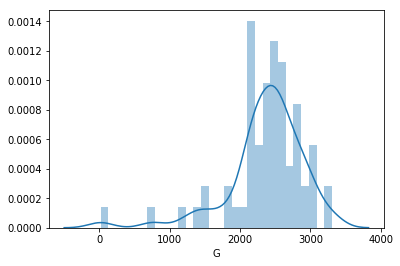

In [57]:
batting_nopitching_Y = batting_nopitching[batting_nopitching['inducted']=='Y']
sns.distplot(batting_nopitching_Y.G, bins=30)

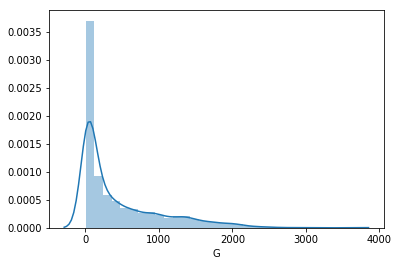

In [58]:
batting_nopitching_N = batting_nopitching[batting_nopitching['inducted']=='N']
sns.distplot(batting_nopitching_N.G, bins=30)

In [36]:
fielding['FPCT'] = (fielding['A'] + fielding['PO']) / ( fielding['A'] + fielding['PO'] + fielding['E'])
fielding_con_col = ['playerID','FPCT']

In [37]:
fielding_POS = fielding.loc[fielding['FPCT']>0.950,['POS','FPCT']].groupby('POS').mean()
fielding_POS.T

POS,1B,2B,3B,C,OF,P,SS
FPCT,0.991641,0.985023,0.983807,0.987028,0.986373,0.992358,0.980575


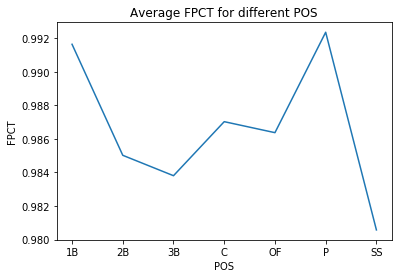

In [38]:
POS_list = list(fielding_POS.index)
x = list(range(len(POS_list)))
y = list(fielding_POS.FPCT)
plt.plot(x,y)
plt.xticks(x, POS_list)
plt.title("Average FPCT for different POS")
plt.xlabel("POS")
plt.ylabel("FPCT")
plt.show()

In [39]:
fielding_cate = fielding[['playerID','POS']].groupby('playerID').agg(lambda x: x.value_counts().index[0])
fielding_cate.head()

,POS
playerID,
aardsda01,P
aaronha01,OF
aaronto01,1B
aasedo01,P
abadan01,1B


In [40]:
fielding1 = fielding.merge(fielding_cate,on='playerID')
fielding2 = fielding1[fielding1['POS_x']==fielding1['POS_y']]
fielding2.head()

,playerID,yearID,stint,teamID,lgID,POS_x,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,FPCT,POS_y
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN,0.666667,SS
4,addybo01,1873,2,BS1,NaN,OF,31,NaN,843.0,30,3,14.0,0,NaN,NaN,NaN,NaN,NaN,0.702128,OF
9,addybo01,1875,1,PH2,NaN,OF,68,NaN,1800.0,91,14,33.0,2,NaN,NaN,NaN,NaN,NaN,0.760870,OF
10,addybo01,1876,1,CHN,NL,OF,32,NaN,897.0,46,6,13.0,0,NaN,NaN,NaN,NaN,NaN,0.800000,OF
11,addybo01,1877,1,CN1,NL,OF,57,NaN,1473.0,74,17,22.0,5,NaN,NaN,NaN,NaN,NaN,0.805310,OF


In [44]:
fielding_cont = fielding2[['playerID','FPCT']].groupby('playerID').mean()
fielding_cont.head()

,FPCT
playerID,
aardsda01,0.884354
aaronha01,0.979124
aaronto01,0.982705
aasedo01,0.955399
abadan01,0.986486


In [45]:
fielding_group = pd.concat([fielding_cont,fielding_cate],axis=1)
# filter playres whoes FPCT is null
fielding_group.dropna(axis=0,how='any',inplace=True)

In [46]:
fielding_group.shape

(18171, 2)

## 5. Merge Fielding table

In [47]:
merged_player3 = fielding_group.merge(merged_player2, on="playerID")
merged_player3.shape

(7927, 18)

In [48]:
merged_player3.inducted.value_counts()

N    7830
Y      97
Name: inducted, dtype: int64

In [49]:
97/7829

0.012389832673393792

In [50]:
merged_player3.columns

Index(['playerID', 'FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'debut', 'finalGame', 'weight', 'servingDays',
       'debutAge', 'inducted'],
      dtype='object')

In [51]:
merged_player3.to_csv("merged_players42-12.csv")